## CS4055 Project
# Cathal Daly, James Shally, Patrick O' Hora

- MinTemp: The minimum temperature in degrees celsius
- MaxTemp: The maximum temperature in degrees celsius
- Rainfall:The amount of rainfall recorded for the day in mm
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- SunshineThe number of hours of bright sunshine in the day.
- RainTodayBoolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrowThe target variable. Did it rain tomorrow?

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import seaborn as sns

In [2]:
df = pd.read_csv('./weatherAUS.csv')

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,06/12/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,07/12/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,08/12/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,09/12/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,10/12/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


- First 10 rows of the Dataset

In [4]:
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142183,15/06/2017,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,0.0,No
142184,16/06/2017,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,0.0,No
142185,17/06/2017,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,0.0,No
142186,18/06/2017,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0.0,No
142187,19/06/2017,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,0.0,No
142188,20/06/2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


- Last 10 rows of the Dataset
This dataset is very large with 142,192 rows of data with both numerical and categorical attributes.

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


There are a few inferences we can draw by looking at the output of `describe()`:

- 'Rainfall' has 1407 missing values 
- 'MinTemp' has 638 missing values
- 'MaxTemp' has 323 missing values
- 'Sunshine' has 67,815 missing values
- 'Evaporation' has 60,842 missing values

In [6]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
df['RainTomorrow'].count()

142193

There are no missing values for RainTomorrow attribute

## C. Distribution Analysis for Numerical Atributes

Text(0, 0.5, 'Number of Days')

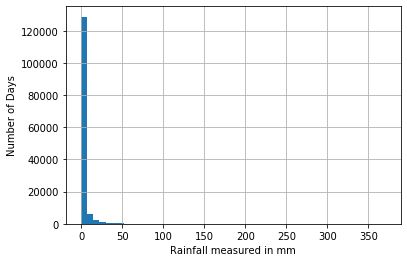

In [8]:
df['Rainfall'].hist(bins=50)
plt.xlabel('Rainfall measured in mm')
plt.ylabel('Number of Days')

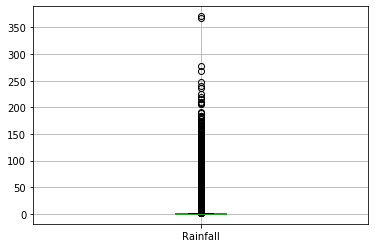

In [9]:
df.boxplot(column='Rainfall')

The Boxplot above confirms the presence of a lot of outliers/extreme values.

Text(0.5, 0.98, '')

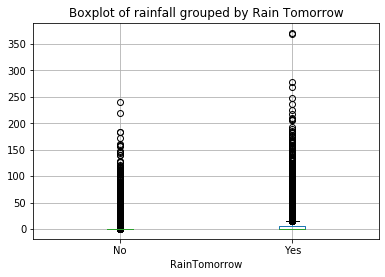

In [10]:
# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='Rainfall', by='RainTomorrow')
plt.title('Boxplot of rainfall grouped by Rain Tomorrow')
plt.suptitle("")

Text(0, 0.5, 'Number of Days')

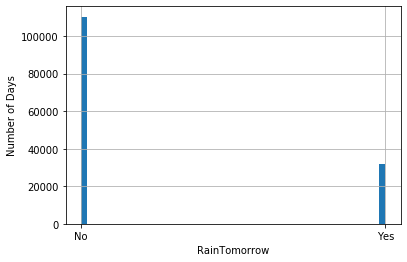

In [11]:
df['RainTomorrow'].hist(bins=50)
plt.xlabel('RainTomorrow')
plt.ylabel('Number of Days')

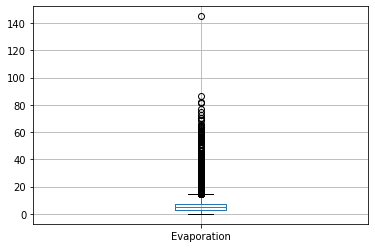

In [12]:
df.boxplot(column='Evaporation')

There are extreme values in both MaxTemp and Evaporation. The datasets will require some data munging. Both MaxTemp and Evaporation have msiing values. Further in the project these missing values will have to be predicted. 

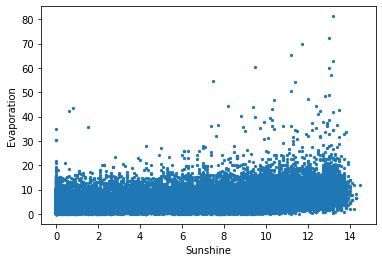

In [13]:
sizes = 5
df.plot.scatter(x='Sunshine', y='Evaporation', s=sizes)

Based on this scatter plot we can say that evaporation probably tends to grow as sunshine grows. 

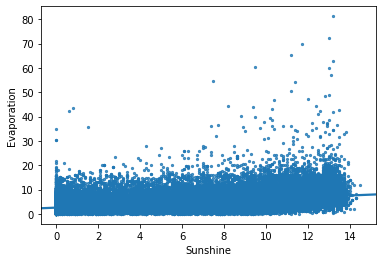

In [14]:
import seaborn as sns
sns.regplot(x='Sunshine', y='Evaporation', data=df, scatter_kws={'s':5})

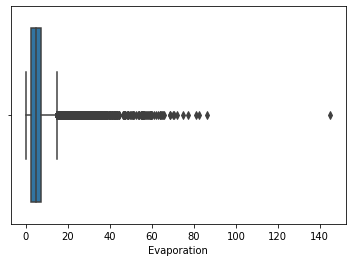

In [15]:
sns.boxplot(x=df['Evaporation'])

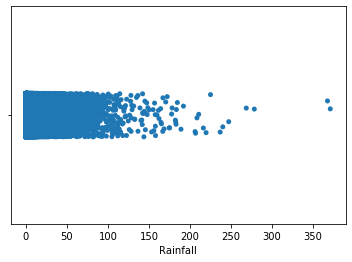

In [16]:
sns.stripplot(x=df['Rainfall'], jitter=True)

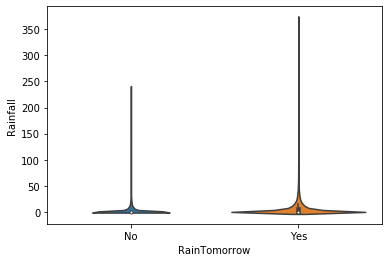

In [17]:
sns.violinplot(x='RainTomorrow', y='Rainfall', data=df)

## Distribution Analysis for Categorical Attributes
RainTomorrow is rather a categorical attribute with two categories
- Yes - It will be raining tomorrow 
- No - It will not be raining tomorrow

In [18]:
frequency_table = df['RainTomorrow'].value_counts(ascending=True)
print('Frequency Table for Rain tomorrow:') 
print(frequency_table)

Frequency Table for Rain tomorrow:
Yes     31877
No     110316
Name: RainTomorrow, dtype: int64


- There is no missing data in the RainTomorrow column

Text(0.5, 1.0, 'RainTomorrow by Number of Days')

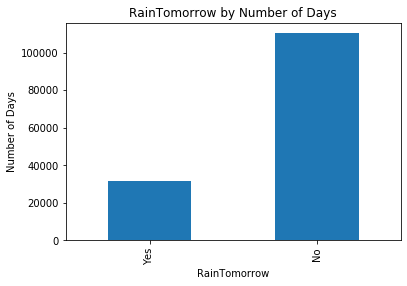

In [19]:
frequency_table.plot(kind='bar')
plt.xlabel('RainTomorrow')
plt.ylabel('Number of Days')
plt.title('RainTomorrow by Number of Days')

Graphed above in the barchart is RainTomorrow with the number of days

Text(0, 0.5, 'Number of Days')

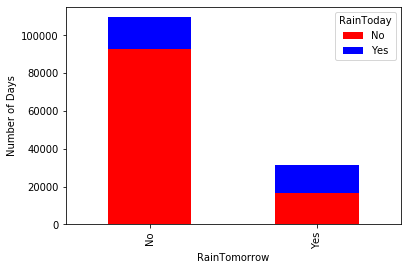

In [20]:
stacked_chart = pd.crosstab(df['RainTomorrow'], df['RainToday'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Days')

This is a stackchart of RainTomorrow in red and RainToday in blue graphed in the number of days in the dataset. 

#### Listing all missing values
Next we must find a list of all missing values for each column, this will help us focus our preparation. We do this since machine learning algorithms rarely work well when we have missing values.

In [21]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1405
RISK_MM              0
RainTomorrow         0
dtype: int64

From this data we can see Evaporation, Sunshine, Clouds at 9am and Clouds at 3am have many missing data fields. We have the choice to either remove the fields with missing data, or attempt to fill them in using other columns. Let's look closer at some of these fields.

#### Inputting missing values for MinTemp and MaxTemp
For this would could use the average, but what would be more accurate is to base the average off two other columns to see if a trend exists which would give us better and more accurate data.


Let's see if a trend shows between `RainToday` and `RainTomorrow` for predicitng them `MinTemp` and `MaxTemp.`

Text(0.5, 0.98, '')

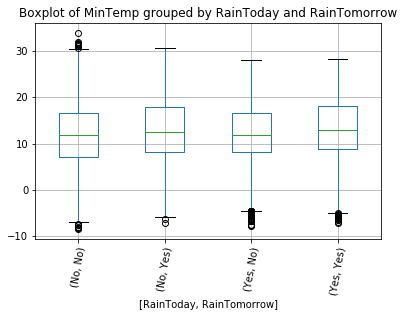

In [22]:
df.boxplot(column='MinTemp', by=['RainToday','RainTomorrow'], rot=80)

plt.title("Boxplot of MinTemp grouped by RainToday and RainTomorrow")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

Text(0.5, 0.98, '')

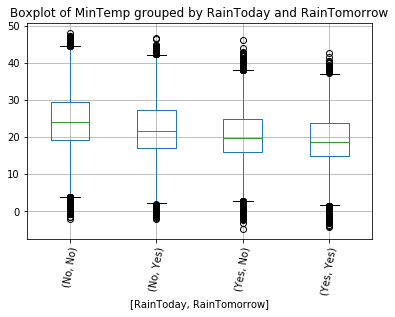

In [23]:
df.boxplot(column='MaxTemp', by=['RainToday','RainTomorrow'], rot=80)
plt.title("Boxplot of MinTemp grouped by RainToday and RainTomorrow")
plt.suptitle("")

We can see some variation in the median of `MinTemp` for each group and these medians can be used for imputing the missing values in each group. But first, we have to ensure that `RainToday` and `RainTomorrow` do not have missing values.

We know already that `RainToday` has 1405  missing values while `RainTomorrow` has none. Let’s look at the frequency table for `RainToday`:

In [24]:
df['RainToday'].value_counts()

No     109332
Yes     31456
Name: RainToday, dtype: int64

As we can see the majority of days it rains, and since it is very unliklely that 1405 will affect the data, we will use the average `yes` for `RainToday.`

In [25]:
df['RainToday'].fillna('Yes', inplace=True)

Next, we create a pivot table, which contains the median values for all four groups.


In [26]:
table = df.pivot_table(values='MaxTemp', 
                       index='RainToday', 
                       columns='RainTomorrow', 
                       aggfunc=np.median)
print(table)



RainTomorrow    No   Yes
RainToday               
No            24.0  21.6
Yes           19.9  18.9


In [27]:
table = df.pivot_table(values='MinTemp', 
                       index='RainToday', 
                       columns='RainTomorrow', 
                       aggfunc=np.median)
print(table)

RainTomorrow    No   Yes
RainToday               
No            11.8  12.6
Yes           11.9  12.9


Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `MinTemp` and `MaxTemp`.

In [28]:
# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['RainToday'], x['RainTomorrow']]

# Replace missing values
df['MinTemp'].fillna(df[df['MinTemp'].isnull()].apply(get_element, axis=1), inplace=True)

# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['RainToday'], x['RainTomorrow']]

# Replace missing values
df['MaxTemp'].fillna(df[df['MaxTemp'].isnull()].apply(get_element, axis=1), inplace=True)

Now we check there are no missing values for both:

In [29]:
df['MinTemp'].describe()

count    142193.000000
mean         12.186010
std           6.388995
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [30]:
df['MaxTemp'].describe()

count    142193.000000
mean         23.201321
std           7.129638
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

In [31]:
def get_element(x):
    return table.loc[x['RainToday'], x['RainTomorrow']]

# Replace missing values
df['WindGustSpeed'].fillna(df[df['WindGustSpeed'].isnull()].apply(get_element, axis=1), inplace=True)


#### For the data values that have less than 10% of the data empty
We will use the averages for each that use RainToday and RainTomorrow if the boxplots show there is some change in average given the two other data sets

Text(0.5, 0.98, '')

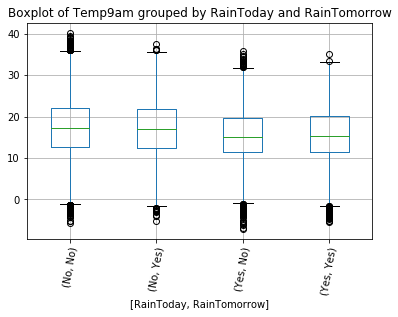

In [32]:
df.boxplot(column='Temp9am', by=['RainToday','RainTomorrow'], rot=80)
plt.title("Boxplot of Temp9am grouped by RainToday and RainTomorrow")
plt.suptitle("")

We see there is very little deviate from the average therfore we can just use the average regardless.

In [33]:
df['Temp9am'] = df['Temp9am'].fillna((df['Temp9am'].mean()))

Text(0.5, 0.98, '')

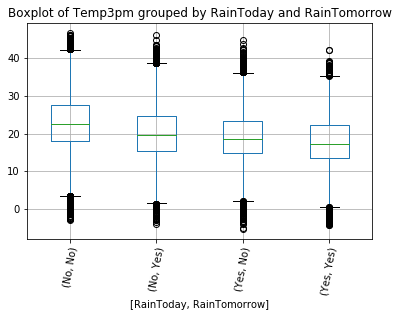

In [34]:
df.boxplot(column='Temp3pm', by=['RainToday','RainTomorrow'], rot=80)
plt.title("Boxplot of Temp3pm grouped by RainToday and RainTomorrow")
plt.suptitle("")

Here there is some deviation from average and therfore we weill use RainToday and RainTomorrow for a better average.

In [35]:
table = df.pivot_table(values='Temp3pm', 
                       index='RainToday', 
                       columns='RainTomorrow', 
                       aggfunc=np.median)
print(table)


RainTomorrow    No   Yes
RainToday               
No            22.5  19.5
Yes           18.6  17.2


In [36]:
def get_element(x):
    return table.loc[x['RainToday'], x['RainTomorrow']]

df['Temp3pm'].fillna(df[df['Temp3pm'].isnull()].apply(get_element, axis=1), inplace=True)

In [37]:
df['Rainfall'] = df['Rainfall'].fillna((df['Rainfall'].mean()))
df['WindSpeed9am'] = df['WindSpeed9am'].fillna((df['WindSpeed9am'].mean()))
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna((df['WindSpeed3pm'].mean()))
df['Humidity9am'] = df['Humidity9am'].fillna((df['Humidity9am'].mean()))
df['Humidity3pm'] = df['Humidity3pm'].fillna((df['Humidity3pm'].mean()))
df['Pressure9am'] = df['Pressure9am'].fillna((df['Pressure9am'].mean()))
df['Pressure3pm'] = df['Pressure3pm'].fillna((df['Pressure3pm'].mean()))
df['Cloud9am'] = df['Cloud9am'].fillna((df['Cloud9am'].mean()))
df['Cloud3pm'] = df['Cloud3pm'].fillna((df['Cloud3pm'].mean()))

In [38]:
df = df.dropna(how='any', subset = ['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [46]:
table = df.pivot_table(values='Sunshine', 
                       index='RainToday', 
                       columns='RainTomorrow', 
                       aggfunc=np.median)
print(table)

RainTomorrow   No  Yes
RainToday             
No            9.8  5.0
Yes           7.2  3.6


In [41]:
def get_element(x):
    return table.loc[x['RainToday'], x['RainTomorrow']]

df['Sunshine'].fillna(df[df['Sunshine'].isnull()].apply(get_element, axis=1), inplace=True)

C:\Users\James\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [43]:
table = df.pivot_table(values='Evaporation', 
                       index='RainToday', 
                       columns='RainTomorrow', 
                       aggfunc=np.median)
print(table)

RainTomorrow   No  Yes
RainToday             
No            5.6  4.6
Yes           3.4  3.2


In [44]:
def get_element(x):
    return table.loc[x['RainToday'], x['RainTomorrow']]

df['Evaporation'].fillna(df[df['Evaporation'].isnull()].apply(get_element, axis=1), inplace=True)

In [45]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000,124668.000000
mean,12.417352,23.467995,2.375463,5.324532,7.960700,40.695263,15.022123,19.180993,67.683590,50.880517,1017.416556,1015.030557,4.422666,4.498181,17.268535,21.888235,2.367742
std,6.361276,7.203801,8.495210,3.313502,3.193862,13.397250,8.315155,8.575571,18.961704,20.823900,6.767579,6.706501,2.277302,2.122260,6.473041,7.002197,8.552713
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.800000,18.100000,0.000000,3.400000,5.400000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000,0.000000
50%,12.200000,23.000000,0.000000,5.600000,9.800000,39.000000,13.000000,19.000000,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.400000,0.000000
75%,17.000000,28.600000,0.800000,5.600000,9.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000,0.800000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [47]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

### Results of Data Preparation 
We can see after imputing the missing data values and in some cases deleting missing values our data averages stay relativily similar to the data we started with. Our data is now ready to be used for machine learning and predicitons. 